# Part II - Impacts of User Type and Age on Ride Durations in Ford GoBike System Data
## by Matheus de Oliveira Portilho

## Investigation Overview

In this investigation, I wanted to look at how different types of users (customers vs. subscribers) use the bike-sharing system and how ride durations vary across different age groups. The main focus was on the ride durations and the demographic characteristics of the users.


## Dataset Overview

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. After cleaning, the dataset consisted of ride details from approximately 180,000 trips.

## Summary of Findings

- Customers typically have longer ride durations than subscribers.
- Ride durations do not show a significant correlation with the age of the members.
- There are more subscribers than customers across all age groups, but the proportion of customers is relatively higher among younger adults.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('tripdata.csv')

## Visualization 1: Ride Duration by User Type

> This boxplot compares the ride durations between customers and subscribers. It shows that customers tend to take longer trips compared to subscribers, who generally prefer shorter rides.

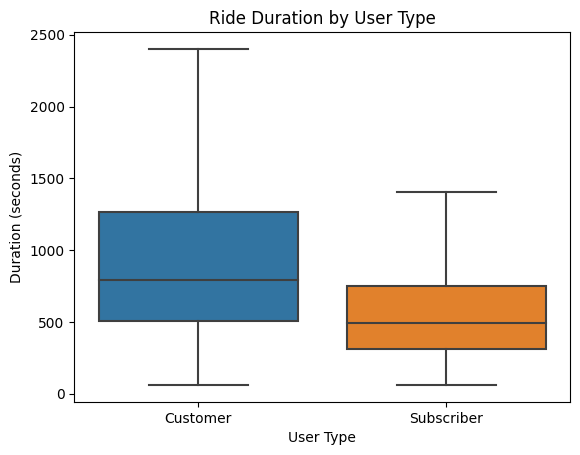

In [3]:
# Code for Visualization 1
# Plot the distribution of ride durations for customers and subscribers
sns.boxplot(data=df, x='user_type', y='duration_sec', showfliers=False)
plt.title('Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (seconds)')
plt.show()

## Visualization 2: Ride Duration by Member Age and User Type

> The scatterplot reveals that there is no strong trend in ride durations across different ages. However, when separating by user type, we see that customers' ride durations are less concentrated and generally higher than those of subscribers.

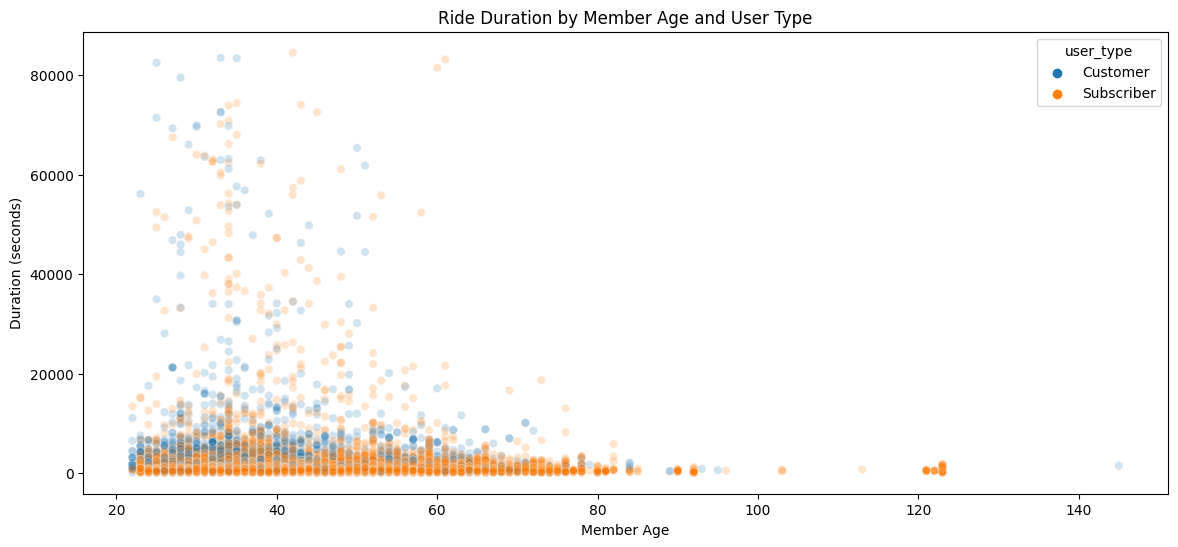

In [4]:
# Code for Visualization 2
# Scatterplot of ride duration by member age, colored by user type
df['member_age'] = 2023 - df['member_birth_year']
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='member_age', y='duration_sec', hue='user_type', alpha=0.2)  # Adjust alpha for transparency
plt.title('Ride Duration by Member Age and User Type')
plt.xlabel('Member Age')
plt.ylabel('Duration (seconds)')
plt.show()

## Visualization 3: User Type Distribution by Age Group

> This heatmap shows the distribution of user types across different age groups. While subscribers dominate across all age groups, the younger age groups (20-30 years) have a relatively higher number of customers.

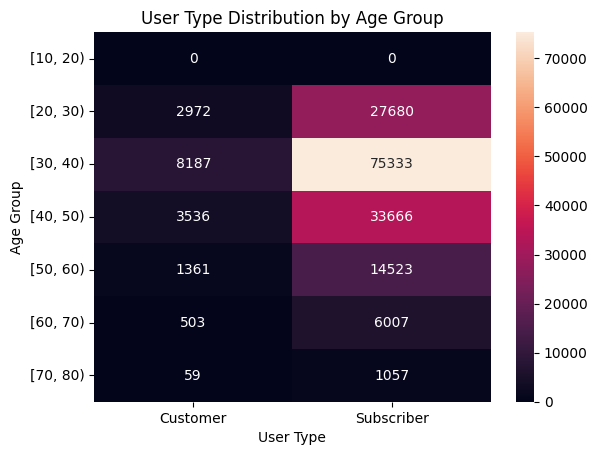

In [5]:
# Code for Visualization 3
# Clustered bar chart of user type distribution by age group
age_bins = [10, 20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['member_age'], bins=age_bins, right=False)
# Count of user types within each age group
ct_counts = df.groupby(['age_group', 'user_type']).size().reset_index(name='count')
ct_counts = ct_counts.pivot(index='age_group', columns='user_type', values='count')
# Creating the heatmap
sns.heatmap(ct_counts, annot=True, fmt='d')
plt.title('User Type Distribution by Age Group')
plt.xlabel('User Type')
plt.ylabel('Age Group')
plt.show()


### Submission

Ensure to export your Jupyter notebook as an HTML file for submission using the 'Download as' function under the 'File' menu in Jupyter. Check that all visualizations are correctly displayed and all personal notes or draft comments are removed.

### Conclusion

This investigation has highlighted key behaviors in the bike-sharing data, particularly the differences in usage patterns between customers and subscribers. While age does not seem to be a major factor in determining ride duration, user type does influence how long users ride. These insights can help tailor services to better meet the needs of different user groups in the bike-sharing program.

In [6]:
!jupyter nbconvert --to html Part_II_notebook.ipynb

[NbConvertApp] Converting notebook Part_II_notebook.ipynb to html
[NbConvertApp] Writing 832599 bytes to Part_II_notebook.html
